In [17]:
import xarray as xr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
daily_path = '/home/links/ct715/eddy_feedback/chapter1/efp_random/data/daily_efp_8models.csv'

day = pd.read_csv(daily_path, index_col=0)
day

,model,efp_nh,efp_sh
0,AWI-CM-1-1-MR,0.2592,0.2557
1,CNRM-CM6-1,0.2244,0.1944
2,CanESM5,0.3133,0.3271
3,FGOALS-f3-L,0.2353,0.1273
4,HadGEM3-GC31-LL,0.1735,0.1729
5,HadGEM3-GC31-MM,0.2525,0.1874
6,IPSL-CM6A-LR,0.2623,0.2015
7,MIROC6,0.1592,0.2058


In [19]:
mixed_path = '/home/links/ct715/eddy_feedback/chapter1/efp_random/data/non-regridded_efp_AWI-fabricated.csv'

mix = pd.read_csv(mixed_path, index_col=0)
mix

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1297,0.0295
1,CESM2,0.3693,0.3419
2,CNRM-CM6-1,0.2421,0.2082
3,CanESM5,0.4256,0.4618
4,E3SMv1,0.0543,0.0542
5,EC-EARTH3,0.2945,0.3135
6,AWI-CM-1-1-MR,0.3724,0.4354
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002


In [20]:
mix_subset = mix[mix['model'].isin(day['model'].unique())].sort_values(by='model').reset_index(drop=True)
mix_subset

,model,efp_nh,efp_sh
0,AWI-CM-1-1-MR,0.3724,0.4354
1,CNRM-CM6-1,0.2421,0.2082
2,CanESM5,0.4256,0.4618
3,FGOALS-f3-L,0.2354,0.1274
4,HadGEM3-GC31-LL,0.2730,0.2951
5,HadGEM3-GC31-MM,0.3137,0.3002
6,IPSL-CM6A-LR,0.2719,0.1959
7,MIROC6,0.2213,0.3253


In [21]:
# Example: assume your dfs are called day, mix, mix_subset
# Add a column to identify which dataframe they came from
day['dataset'] = 'Daily-mean'
mix['dataset'] = 'Sub-daily'
mix_subset['dataset'] = 'Sub-daily (8 models)'

# Concatenate them
df_all = pd.concat([day, mix, mix_subset], ignore_index=True)

# Melt to long format for seaborn
df_melt = df_all.melt(id_vars=['model', 'dataset'], 
                      value_vars=['efp_nh', 'efp_sh'],
                      var_name='hemisphere',
                      value_name='efp')


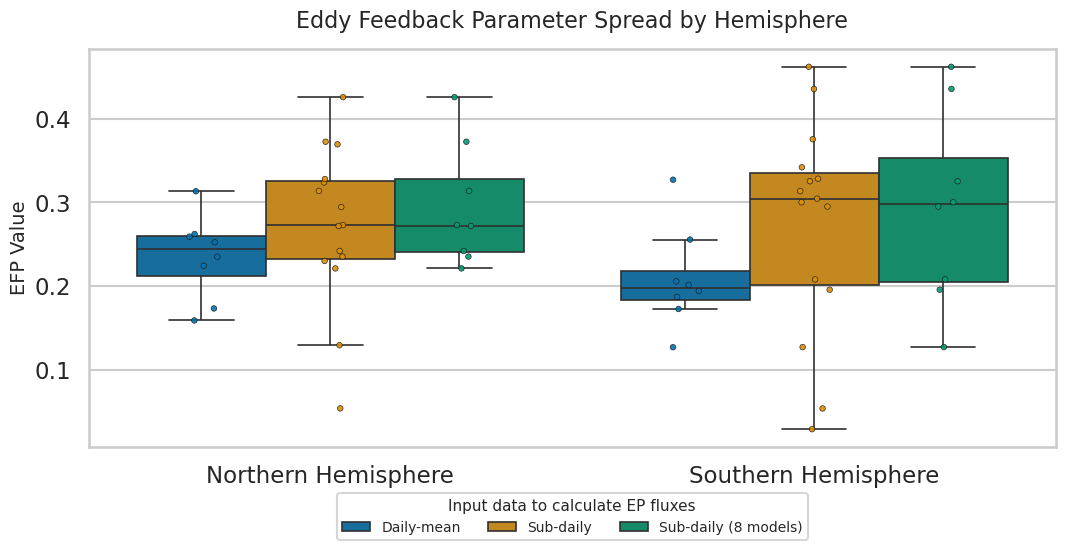

In [22]:
# Set style and context for clarity
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

plt.figure(figsize=(11,6))

# Boxplot
sns.boxplot(
    data=df_melt,
    x='hemisphere', y='efp', hue='dataset',
    linewidth=1.2, showfliers=False,  # No outliers
)

# Overlay stripplot to show individual model values
sns.stripplot(
    data=df_melt,
    x='hemisphere', y='efp', hue='dataset',
    dodge=True, alpha=0.9, size=4, jitter=True,
    marker="o", linewidth=0.5, edgecolor='k'
)

# Tidy up labels and legend
plt.xlabel("")
plt.ylabel("EFP Value", fontsize=14)
plt.title("Eddy Feedback Parameter Spread by Hemisphere", fontsize=16, pad=15)
# After plotting
plt.xticks(
    ticks=[0, 1],   # positions of your categories
    labels=["Northern Hemisphere", "Southern Hemisphere"])

# Remove duplicate handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Place legend inside at bottom center, smaller size
plt.legend(handles[0:3], labels[0:3],
           title="Input data to calculate EP fluxes", loc="lower center",
           bbox_to_anchor=(0.5, -0.25),   # center horizontally, just above bottom
           ncol=3, fontsize=10, title_fontsize=11)


plt.tight_layout()
plt.show()